<a href="https://colab.research.google.com/github/Kritiman2005/Assignment/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Libraries


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Feature Extraction and Data Cleaning

In [16]:
sentiment_df = pd.read_csv("fear_greed_index.csv", parse_dates=['date'])
trader_df = pd.read_csv("historical_data.csv", parse_dates=['Timestamp IST'])



In [28]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])


In [29]:
sentiment_df['sentiment'] = sentiment_df['classification'].apply(
    lambda x: 'Fear' if 'Fear' in x else 'Greed'
)


In [30]:
sentiment_df.head()

,timestamp,value,classification,date,sentiment
0,1517463000,30,Fear,2018-02-01,Fear
1,1517549400,15,Extreme Fear,2018-02-02,Fear
2,1517635800,40,Fear,2018-02-03,Fear
3,1517722200,24,Extreme Fear,2018-02-04,Fear
4,1517808600,11,Extreme Fear,2018-02-05,Fear


In [31]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
 4   sentiment       2644 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 103.4+ KB


In [32]:
sentiment_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0
sentiment,0


In [33]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

trader_df['date'] = trader_df['Timestamp IST'].dt.date


In [34]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [35]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [37]:
trader_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [41]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
trader_df['date'] = pd.to_datetime(trader_df['date']).dt.date


In [42]:
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')


In [43]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,Greed


In [44]:

print("\n💹 Merge Data Features:")
for col in merged_df.columns:
    print(" -", col)


💹 Merge Data Features:
 - Account
 - Coin
 - Execution Price
 - Size Tokens
 - Size USD
 - Side
 - Timestamp IST
 - Start Position
 - Direction
 - Closed PnL
 - Transaction Hash
 - Order ID
 - Crossed
 - Fee
 - Trade ID
 - Timestamp
 - date
 - timestamp
 - value
 - classification
 - sentiment


In [45]:
keep_cols = [
    'Account', 'Coin', 'Execution Price', 'Size USD', 'Side',
    'Timestamp IST', 'Start Position', 'Closed PnL', 'Fee',
    'date', 'value', 'sentiment'
]

In [46]:
merged_df = merged_df[keep_cols]


In [49]:
merged_df.head()

,Account,Coin,Execution Price,Size USD,Side,Timestamp IST,Start Position,Closed PnL,Fee,date,value,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,2024-12-02 22:50:00,0.000000,0.0,0.345404,2024-12-02,80,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,2024-12-02 22:50:00,986.524596,0.0,0.005600,2024-12-02,80,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,2024-12-02 22:50:00,1002.518996,0.0,0.050431,2024-12-02,80,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,2024-12-02 22:50:00,1146.558564,0.0,0.050043,2024-12-02,80,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,2024-12-02 22:50:00,1289.488521,0.0,0.003055,2024-12-02,80,Greed


# EDA

## Average Fee per sentiment

Average Fee by Sentiment:
   sentiment       Fee
0      Fear  1.397763
1     Greed  1.011897


/tmp/ipython-input-83170440.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Fee, x='sentiment', y='Fee', palette='coolwarm')


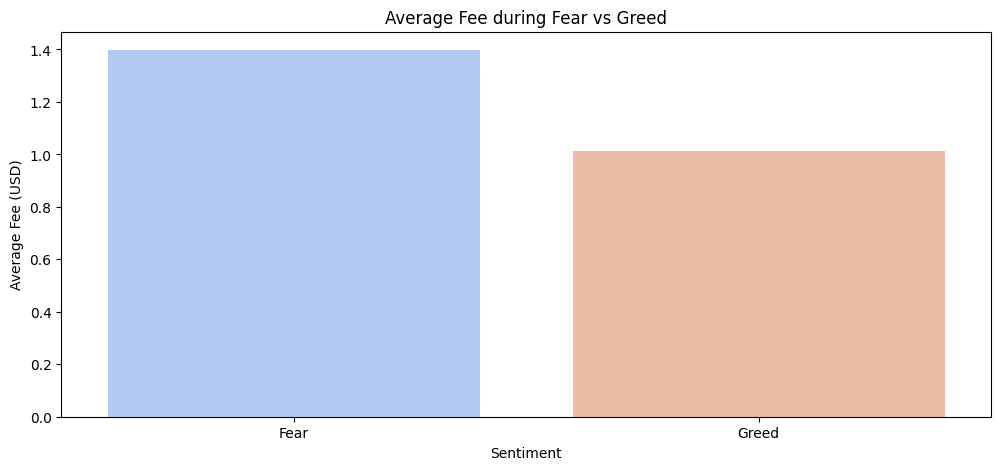

In [56]:
Fee = merged_df.groupby('sentiment')['Fee'].mean().reset_index()
print("Average Fee by Sentiment:\n", Fee)

plt.figure(figsize=(12,5))
sns.barplot(data=Fee, x='sentiment', y='Fee', palette='coolwarm')
plt.title("Average Fee during Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Average Fee (USD)")
plt.savefig("avg_fee_by_sentiment.png")
plt.show()

# Volume VS Sentiment

Average Trade Volume by Sentiment:
   sentiment     Size USD
0      Fear  7182.011019
1     Greed  4635.764077


/tmp/ipython-input-299980341.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume_by_sentiment, x='sentiment', y='Size USD', palette='magma')


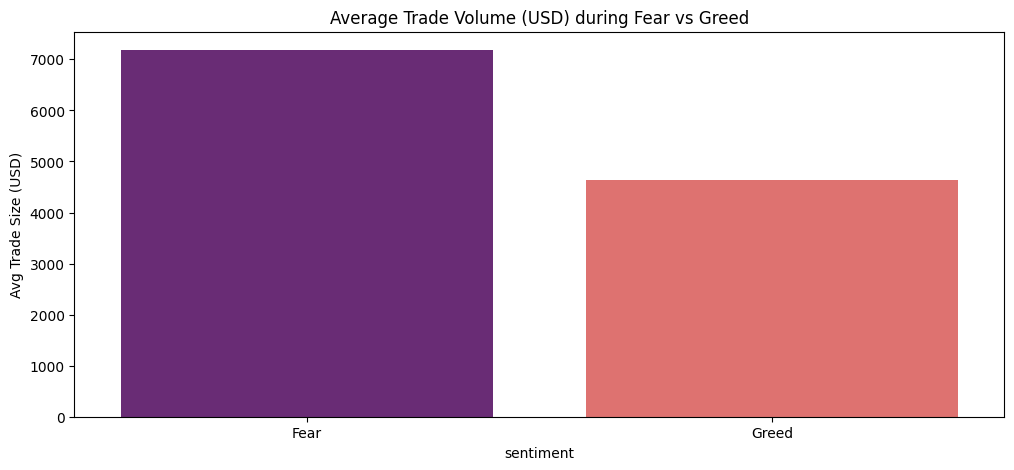

In [58]:
volume_by_sentiment = merged_df.groupby('sentiment')['Size USD'].mean().reset_index()
print("Average Trade Volume by Sentiment:\n", volume_by_sentiment)

plt.figure(figsize=(12,5))
sns.barplot(data=volume_by_sentiment, x='sentiment', y='Size USD', palette='magma')
plt.title("Average Trade Volume (USD) during Fear vs Greed")
plt.ylabel("Avg Trade Size (USD)")
plt.savefig("volume_by_sentiment.png")
plt.show()

##Market Timing Impact


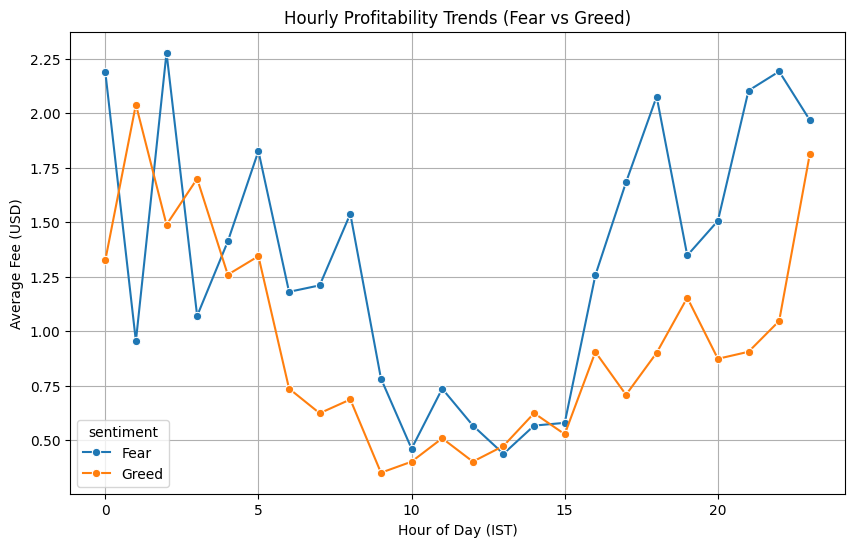

In [59]:
merged_df['hour'] = pd.to_datetime(merged_df['Timestamp IST']).dt.hour

timing_analysis = (
    merged_df.groupby(['hour', 'sentiment'])['Fee']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(data=timing_analysis, x='hour', y='Fee', hue='sentiment', marker='o')
plt.title("Hourly Profitability Trends (Fear vs Greed)")
plt.xlabel("Hour of Day (IST)")
plt.ylabel("Average Fee (USD)")
plt.grid(True)
plt.savefig("hourly_profit_by_sentiment.png")
plt.show()